**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [287]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
#ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output

# import data 2C_weka.csv for 2 Class Classifcation.


In [288]:
# read csv(comma separated value) into data
df = pd.read_csv("2Classdata.csv")


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value
Look at the unique values of class values
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [289]:
df.columns  #Columns in our data 

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [290]:
#Look at the head of dataset.
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [291]:
# Look at the tail of dataset.
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [292]:
# Find the missing value.
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [293]:
# the unique values of class values
df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [295]:
# Get the datatype information about the dataset
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

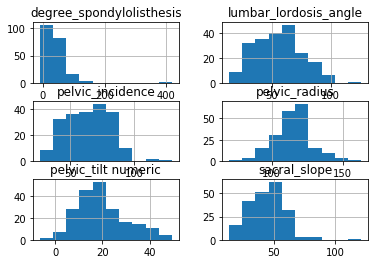

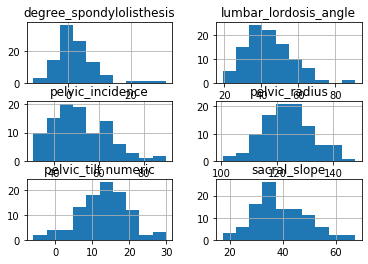

In [296]:
# distribution of class values and other attributes

df.groupby('class').hist();


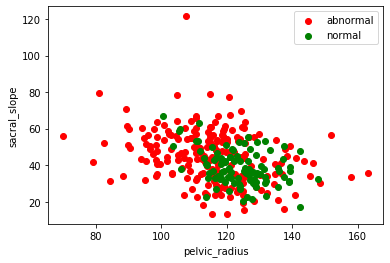

In [297]:
## Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

abnormal = df[df["class"] == "Abnormal"]
normal = df[df["class"] == "Normal"]

plt.scatter(abnormal.pelvic_radius, abnormal.sacral_slope,color = "red",label = "abnormal")
plt.scatter(normal.pelvic_radius, normal.sacral_slope,color = "green",label = "normal")
plt.legend()
plt.xlabel("pelvic_radius")
plt.ylabel("sacral_slope")
plt.show()

# Encode the Class variable to integer.

In [298]:
# Encode the Class variable to integer
from sklearn.preprocessing import LabelEncoder
number =  LabelEncoder()
df["class"] = number.fit_transform(df["class"])
df.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,1
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,0
224,89.834676,22.639217,90.563461,67.195460,100.501192,3.040973,1
100,84.585607,30.361685,65.479486,54.223922,108.010219,25.118478,0
189,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,0
64,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,0
268,57.145851,16.489091,42.842148,40.656760,113.806177,5.015186,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
101,79.938570,18.774071,63.311835,61.164499,114.787107,38.538741,0
98,77.655119,22.432950,93.892779,55.222169,123.055707,61.211187,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [299]:
y = df["class"].values
x_data = df.drop(["class"],axis = 1)

# Split the dat as train and test with a ratio of 70:30.¶

In [300]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 1) # 70% train, 30% test

# Normalize your Data (X) to get values between 0 to 1.

In [301]:

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)) # Normalize
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [302]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [303]:
test_pred=knn.predict(x_test)
if test_pred.all()== 0:
    print("Predicted class on test dataset is Abnormal")
else:
        print("Predicted class on test dataset is normal")

Predicted class on test dataset is Abnormal


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [304]:
print('performance score of of your classification on test dataset')
print("KNN score :", knn.score(x_test,y_test))

performance score of of your classification on test dataset
KNN score : 0.7096774193548387


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [305]:
# Model complexity
neg = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neg):
    # k from 1 to 25(exclude)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 25)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(x_train)
    scaledX_test = sc.transform(x_test)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(scaledX_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(scaledX_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(scaledX_test, y_test))

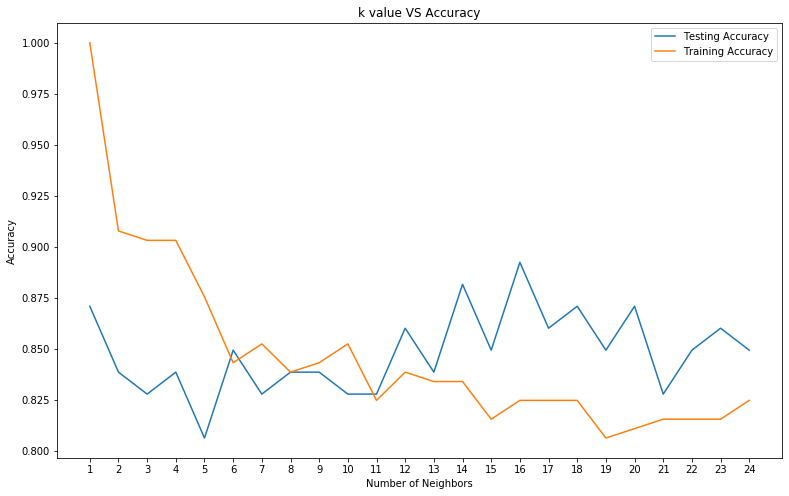

Best accuracy is 0.8924731182795699 with K = 16


In [306]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [307]:
# read csv(comma separated value) into data
df1 = pd.read_csv("3Classdata.csv")

# Explore the data set.Get necessary information about the data.
Look at the head and tail of dataset. Find the missing value Look at the unique values of class values Look at the distribution of class values and other attributes. Get the datatype information about the dataset Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [308]:
df1.columns  #Columns in our data 

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [309]:
#Look at the head of dataset.
df1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [310]:
# Look at the tail of dataset.
df1.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [311]:
# Find the missing value.
df1.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [312]:
# the unique values of class values
df1['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [313]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [314]:
# Get the datatype information about the dataset
df1.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

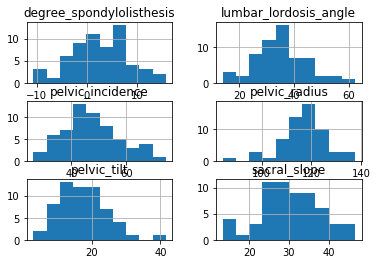

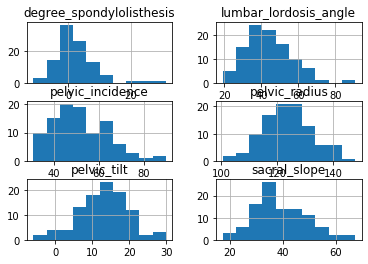

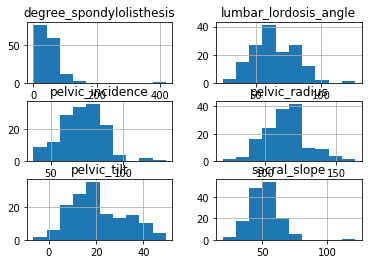

In [315]:
# distribution of class values and other attributes

df1.groupby('class').hist();

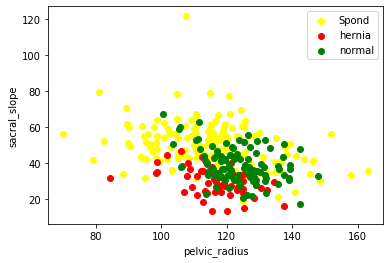

In [316]:
## Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

hernia = df1[df1["class"] == "Hernia"]
normal = df1[df1["class"] == "Normal"]
Spond = df1[df1["class"] == "Spondylolisthesis"]

plt.scatter(Spond.pelvic_radius, Spond.sacral_slope,color = "yellow",label = "Spond")
plt.scatter(hernia.pelvic_radius, hernia.sacral_slope,color = "red",label = "hernia")
plt.scatter(normal.pelvic_radius, normal.sacral_slope,color = "green",label = "normal")
plt.legend()
plt.xlabel("pelvic_radius")
plt.ylabel("sacral_slope")
plt.show()

# Encode the Class variable to integer.

In [317]:
# Encode the Class variable to integer
from sklearn.preprocessing import LabelEncoder
number =  LabelEncoder()
df1["class"] = number.fit_transform(df1["class"])
df1.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
24,36.125683,22.758753,29.000000,13.366931,115.577116,-3.237562,0
166,56.991404,6.874089,57.009005,50.117315,109.978045,36.810111,2
199,75.298478,16.671484,61.296204,58.626995,118.883388,31.575823,2
285,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540,1
88,56.605771,16.800200,42.000000,39.805571,127.294522,24.018575,2
269,37.140150,16.481240,24.000000,20.658910,125.014361,7.366425,1
194,72.643850,18.929117,68.000000,53.714733,116.963416,25.384247,2
162,118.144655,38.449501,50.838520,79.695154,81.024541,74.043767,2


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [318]:
y = df1["class"].values
x_data = df1.drop(["class"],axis = 1)

# Split the dat as train and test with a ratio of 70:30.

In [319]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 1) # 70% train, 30% test

# Normalize your Data (X) to get values between 0 to 1.

In [320]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)) # Normalize /scale
x.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


# Build the KNN model using Train Dataset and predict the class on test dataset.


In [321]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [322]:
test_pred=knn.predict(x_test)
if test_pred.all()== 0:
    print("Predicted class on test dataset is Abnormal")
else:
        print("Predicted class on test dataset is normal")

Predicted class on test dataset is Abnormal


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [323]:
print('performance score of of your classification on test dataset')
print("KNN score :", knn.score(x_test,y_test))

performance score of of your classification on test dataset
KNN score : 0.44086021505376344


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [324]:
# Model complexity
neg = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neg):
    # k from 1 to 25(exclude)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 25)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(x_train)
    scaledX_test = sc.transform(x_test)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(scaledX_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(scaledX_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(scaledX_test, y_test))

In [ ]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))